In [21]:
import cv2

import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread,imshow,imsave

import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread,imshow,imsave

path




## Mean Filter


(321, 481, 3)
AxesImage(32.4357,27.8;388.764x245.739)


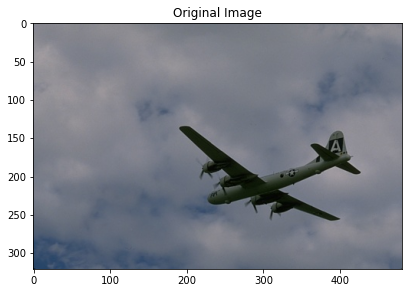

In [16]:
# Getting Orignal Image 25%
orignal_img = imread("C:\\Users\\Abhijeet\\Downloads\\Task-A-Dataset-denoising\\Task-A-Dataset-denoising\\original\\0000.png")
print(orignal_img.shape)


imshow(orignal_img)
plt.title('Original Image')
print(plt.imshow(orignal_img))


(321, 481, 3)
AxesImage(10.8,27.8;698.4x317.823)


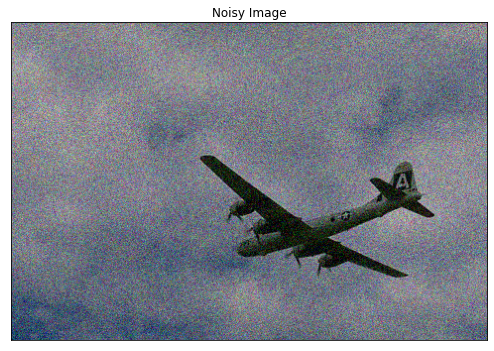

In [60]:
# Getting 25% Noisy Image
noisy_img = imread("C:\\Users\\Abhijeet\\Downloads\\Task-A-Dataset-denoising\\Task-A-Dataset-denoising\\noisy25\\0000.png")
print(noisy_img.shape)


imshow(noisy_img)
plt.title('Noisy Image')
plt.xticks([]), plt.yticks([])
print(plt.imshow(noisy_img))





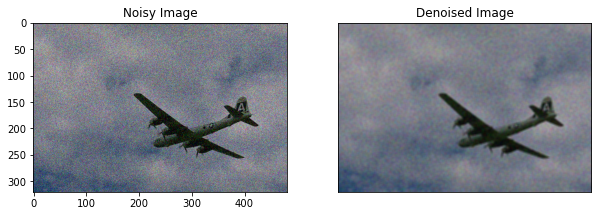

In [102]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(orignal_img,-1,kernel)


blur = cv2.blur(noisy_img,(5,5))




plt.subplot(1,2,1), plt.imshow(noisy_img),plt.title('Noisy Image')

plt.subplot(1,2,2), plt.imshow(blur),plt.title('Denoised Image')
plt.xticks([]), plt.yticks([])
plt.show()
# Adjust figure sizes
plt.rcParams['figure.figsize'] = [10,5]

## Median Filter

(321, 481, 3)
AxesImage(10.8,27.8;698.4x317.823)


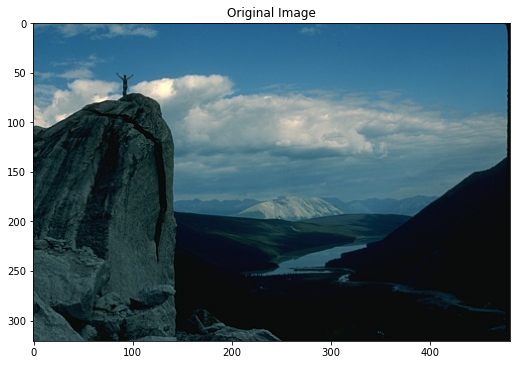

In [61]:
# Getting Orignal Image 
orignal_img_med = imread("C:\\Users\\Abhijeet\\Downloads\\Task-A-Dataset-denoising\\Task-A-Dataset-denoising\\original\\0002.png")
print(orignal_img_med.shape)


imshow(orignal_img_med)
plt.title('Original Image')
print(plt.imshow(orignal_img_med))

(321, 481, 3)
AxesImage(10.8,27.8;698.4x317.823)


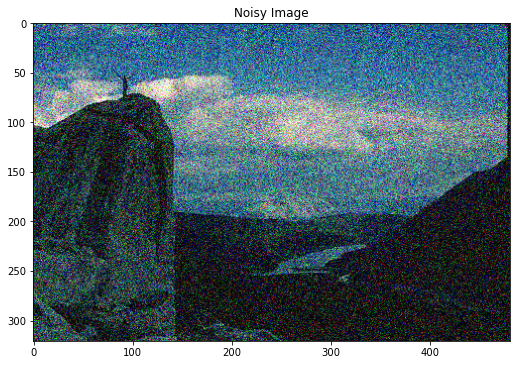

In [71]:
# Getting noisy Image 50%
noisy_img_med = imread("C:\\Users\\Abhijeet\\Downloads\\Task-A-Dataset-denoising\\Task-A-Dataset-denoising\\noisy50\\0002.png")
print(noisy_img_med.shape)


imshow(noisy_img_med)
plt.title('Noisy Image')
print(plt.imshow(noisy_img_med))


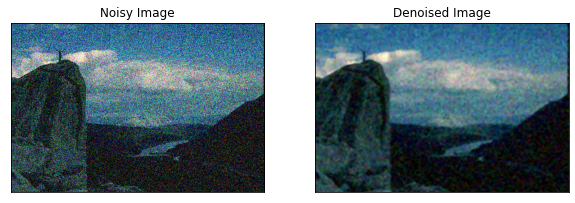

In [69]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(orignal_img_med,-1,kernel)


median = cv2.medianBlur(noisy_img_med,5)

plt.subplot(1,2,1),plt.imshow(orignal_img_med),plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.imshow(noisy_img_med),plt.title('Noisy Image')

plt.subplot(1,2,2), plt.imshow(median),plt.title('Denoised Image')
plt.xticks([]), plt.yticks([])
plt.show()

## Wavelet Transform

In [93]:
import matplotlib.pyplot as plt
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage.metrics import peak_signal_noise_ratio
import skimage.io

(321, 481, 3)
AxesImage(10.8,27.8;698.4x317.823)


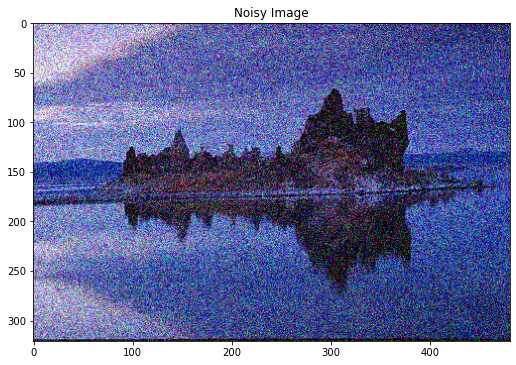

In [76]:
# Getting noisy Image 50%
noisy_img_wave = imread("C:\\Users\\Abhijeet\\Downloads\\Task-A-Dataset-denoising\\Task-A-Dataset-denoising\\noisy50\\0023.png")
print(noisy_img_wave.shape)


imshow(noisy_img_wave)
plt.title('Noisy Image')
print(plt.imshow(noisy_img_wave))



(321, 481, 3)
AxesImage(10.8,27.8;698.4x317.823)


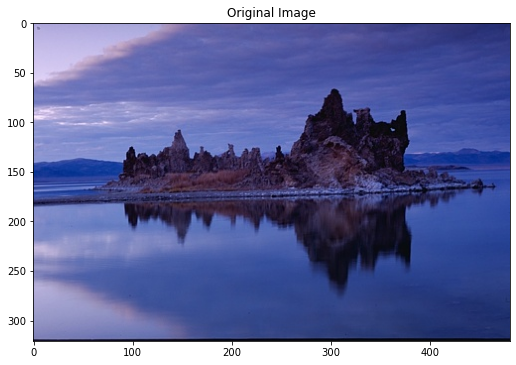

In [74]:
# Getting Orignal Image 
orignal_img_wave = imread("C:\\Users\\Abhijeet\\Downloads\\Task-A-Dataset-denoising\\Task-A-Dataset-denoising\\original\\0023.png")
print(orignal_img_wave.shape)


imshow(orignal_img_wave)
plt.title('Original Image')
print(plt.imshow(orignal_img_wave))

Text(0.5, 1.0, 'Orignal Image')

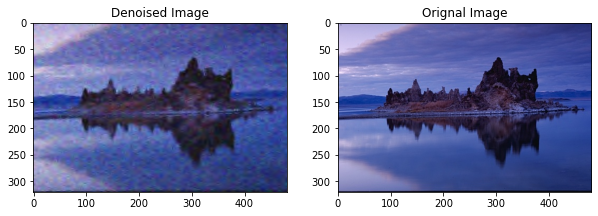

In [103]:
# converting image to float
noisy_img_wave =  skimage.img_as_float(noisy_img_wave)

# estimating the noise
noise_est = estimate_sigma(noisy_img_wave, average_sigmas=False, multichannel=True)



# denoise the image using BayesShrink

# performs wavelet denoising on an image

denoised_image = denoise_wavelet(noisy_img_wave,sigma=None,wavelet='coif5',mode='soft',wavelet_levels=3,multichannel=True,
    convert2ycbcr=True,
    method='BayesShrink',
    rescale_sigma=False)

# # display images
plt.subplot(1,2,1)
plt.imshow(denoised_image)
plt.title('Denoised Image')
plt.subplot(1,2,2)
plt.imshow(orignal_img_wave)
plt.title('Orignal Image')

## Deep Learning

In [113]:
##Denoising using deep learning
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

In [161]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


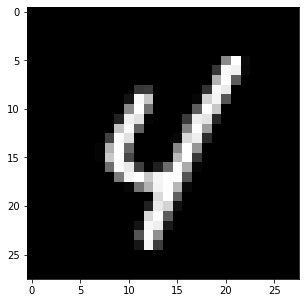

In [162]:
index = np.random.randint(0,len(X_train))
plt.imshow(X_train[np.random.randint(index)], cmap = plt.get_cmap('gray'))

In [163]:
dim = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], dim).astype('float32')
X_test = X_test.reshape(X_test.shape[0], dim).astype('float32')


In [164]:
X_train = X_train / 255
X_test = X_test / 255
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [165]:
noise = 0.3
X_train_noisy = X_train + noise * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [170]:
denoised_model = Sequential()
denoised_model.add(Dense(500, input_dim= dim, activation='relu'))
denoised_model.add(Dense(300, activation='relu'))
denoised_model.add(Dense(100, activation='relu'))
denoised_model.add(Dense(300, activation='relu'))
denoised_model.add(Dense(500, activation='relu'))
denoised_model.add(Dense(784, activation='sigmoid'))
denoised_model.compile(loss='mean_squared_error', optimizer='adam')

In [172]:
denoised_model.fit(X_train_noisy, X_train, validation_data=(X_test_noisy, X_test), epochs= 100 , batch_size= 150)

Epoch 1/100
400/400 [==============================] - 4s 9ms/step - loss: 0.0386 - val_loss: 0.0199
Epoch 2/100
400/400 [==============================] - 3s 9ms/step - loss: 0.0175 - val_loss: 0.0152
Epoch 3/100
400/400 [==============================] - 3s 9ms/step - loss: 0.0141 - val_loss: 0.0130
Epoch 4/100
400/400 [==============================] - 4s 9ms/step - loss: 0.0124 - val_loss: 0.0117
Epoch 5/100
400/400 [==============================] - 4s 9ms/step - loss: 0.0113 - val_loss: 0.0108
Epoch 6/100
400/400 [==============================] - 3s 9ms/step - loss: 0.0105 - val_loss: 0.0103
Epoch 7/100
400/400 [==============================] - 4s 9ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 8/100
400/400 [==============================] - 3s 9ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 9/100
400/400 [==============================] - 4s 9ms/step - loss: 0.0091 - val_loss: 0.0093
Epoch 10/100
400/400 [==============================] - 3s 9ms/step - loss: 0.0088 - val_lo

400/400 [==============================] - 4s 9ms/step - loss: 0.0053 - val_loss: 0.0080
Epoch 82/100
400/400 [==============================] - 3s 9ms/step - loss: 0.0052 - val_loss: 0.0079
Epoch 83/100
400/400 [==============================] - 3s 9ms/step - loss: 0.0052 - val_loss: 0.0079
Epoch 84/100
400/400 [==============================] - 3s 9ms/step - loss: 0.0052 - val_loss: 0.0079
Epoch 85/100
400/400 [==============================] - 4s 9ms/step - loss: 0.0052 - val_loss: 0.0080
Epoch 86/100
400/400 [==============================] - 4s 9ms/step - loss: 0.0052 - val_loss: 0.0079
Epoch 87/100
400/400 [==============================] - 4s 9ms/step - loss: 0.0052 - val_loss: 0.0080
Epoch 88/100
400/400 [==============================] - 4s 9ms/step - loss: 0.0052 - val_loss: 0.0080
Epoch 89/100
400/400 [==============================] - 3s 9ms/step - loss: 0.0052 - val_loss: 0.0080
Epoch 90/100
400/400 [==============================] - 4s 9ms/step - loss: 0.0052 - val_loss: 

In [182]:
scores = denoised_model.evaluate(X_test_noisy,y_test)
print("Accuracy: %.2f%%" % (int(scores)))

313/313 [==============================] - 1s 3ms/step - loss: 27.0676
Accuracy: 27.00%


In [183]:
model_pred = denoised_model.predict(X_test_noisy)

Test_images


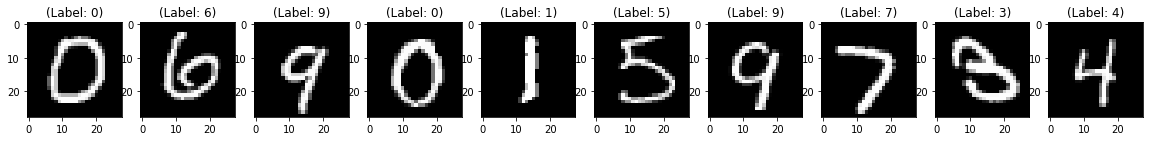

Noisey test images


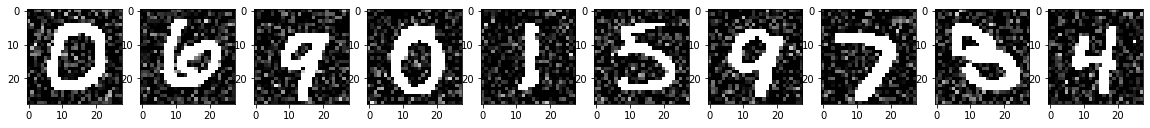

Denoised image by Auto-Encoder Model 


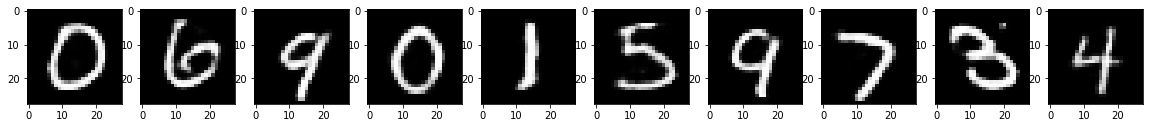

In [184]:
X_test = np.reshape(X_test, (10000,28,28)) *255
pred = np.reshape(model_pred, (10000,28,28)) *255
X_test_noise = np.reshape(X_test_noise, (-1,28,28)) *255

plt.figure(figsize=(20, 4))
print("Test_images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()  

plt.figure(figsize=(20, 4))
print("Noisey test images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test_noise[i,:,:], cmap='gray')
plt.show()  

plt.figure(figsize=(20, 4))
print("Denoised image by Auto-Encoder Model ")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()


  ## MSE & SSIM